In [1]:
import numpy as np
import math
import random
from scipy.optimize import fmin
import operator
import matplotlib.pyplot as plt

In [2]:
def Fitness(Choromosome):
    sum1=0
    sum2=0
    for gene in Choromosome:
        sum1+=pow(gene, 2) 
        sum2+=math.cos(2*math.pi*gene) 
        
    y = -20*math.exp(-0.2*math.sqrt(sum1/len(Choromosome)))-math.exp(sum2/len(Choromosome))+math.exp(1)+20
    return y

In [3]:
def to_binary(number):
    # size included sign byte
    
    num = number
    if num < 0:
        num = num*(-1)
    
    num_bin = "{0:b}".format(int(num)).zfill(5)
    
    j=0
    
    if number<0:
        num_bin="1"+num_bin
    else:
        num_bin="0"+num_bin
        
    return num_bin
    

In [4]:
def to_decimal(number):
    
    # Return integer
    
    sign=number[0]
    number=number[1:]
    
    x = int(number, 2)
    
    if sign == "1":
        return x*-1
    else:
        return x

In [5]:
def selection(fit,chorom,output_size):
    #size is output size
    
    pop=[]
    for i in range(len(fit)):
        t =[]
        t.append(fit[i]) #index 0
        t.append(chorom[i])
        pop.append(t)
    
    pop_s=sorted(pop, key=operator.itemgetter(0), reverse=True)
    
    
    weights = []
    
    for i in range(len(fit)):
        weights.append(i+1)
    
    #fit.sort(reverse=True)
    population = random.choices(pop_s, weights = weights , k = output_size)
    
    pop_c=[]
    for x in population:
        pop_c.append(x[1])
    
    # return in decimal
    return pop_c

In [6]:
def cross_one_point(parent1, parent2) :
    
    index = random.choice([0,1,2,3,4,5])
    #print(index)
    child = ""
    #print(index)
    for i in range(0,len(parent2)) :
        if i < index :
            child=child+parent1[i]
        else :
            child=child+parent2[i]
    
    return child

In [7]:
def mutation(chorom_sery):
    # example ["100101,"100010","011010","100001","110010"]
    
    index=[] # indexes of choromosomes that will be changed
    
    for i in range(0,len(chorom_sery)//5):
        index.append(random.randint(0,len(chorom_sery[0])-1))
    
    for j in range(len(index)):
        
        i = random.randint(0,len(chorom_sery)-1)
        ch = chorom_sery[i]
        # which chorom will be changed
        
        
        if ch[index[j]]=="0":
            ch=ch[:index[j]]+"1"+ch[index[j]+1:]
        else:
            ch=ch[:index[j]]+"0"+ch[index[j]+1:]
            
        chorom_sery[i]=ch
        
        
    return chorom_sery

In [8]:
def mutation2(chorom_sery):
    # example ["100101,"100010","011010","100001","110010"]
    
    index=[] # indexes of choromosomes that will be changed
    
    for i in range(0,len(chorom_sery)//5):
        index.append(random.randint(1,len(chorom_sery[0])-1))
    
    for j in range(len(index)):
        
        i = random.randint(0,len(chorom_sery)-1)
        ch = chorom_sery[i]
        # which chorom will be changed
        
        
        if ch[index[j]]=="0":
            ch=ch[:index[j]]+"1"+ch[index[j]+1:]
        else:
            ch=ch[:index[j]]+"0"+ch[index[j]+1:]
            
        chorom_sery[i]=ch
        
        
    return chorom_sery

In [9]:
def first_population(population_size,d,s):
    chorom = []
    #chorom_bin = []
    random.seed(s)
    for p in range(population_size):
        temp=[]
        #temp_bin=[]
        for x in range(d) :
            gene=random.randint(-32,32)
            #temp_bin.append( bin( gene ).replace("0b","").zfill(6))
            temp.append(gene)
        chorom.append(temp)
        #chorom_bin.append(temp_bin)
    return chorom

In [10]:
def fitness_cal(pop):
    # pop in decimal
    
    cal=[]
    
    for cs in pop:
        cal.append(round(Fitness(cs),4))
    
    return cal

In [14]:
# size
D = 10
population_size = 10
selection_size = 10
generation_num = 900

time: 1
min in generation 0 is: 18.704
min in generation 1 is: 18.4761
min in generation 2 is: 18.9435
min in generation 3 is: 18.568
min in generation 4 is: 18.5777
min in generation 5 is: 18.3655
min in generation 6 is: 18.308
min in generation 7 is: 18.4078
min in generation 8 is: 17.6493
min in generation 9 is: 18.1126
min in generation 10 is: 17.2299
min in generation 11 is: 16.9527
min in generation 12 is: 14.6362
min in generation 13 is: 16.412
min in generation 14 is: 15.4558
min in generation 15 is: 16.243
min in generation 16 is: 15.0468
min in generation 17 is: 16.2565
min in generation 18 is: 15.5817
min in generation 19 is: 16.109
min in generation 20 is: 12.0018
min in generation 21 is: 13.4557
min in generation 22 is: 15.0111
min in generation 23 is: 14.46
min in generation 24 is: 15.5344
min in generation 25 is: 13.3847
min in generation 26 is: 14.1041
min in generation 27 is: 14.6362
min in generation 28 is: 15.8166
min in generation 29 is: 15.0961
min in generation 30

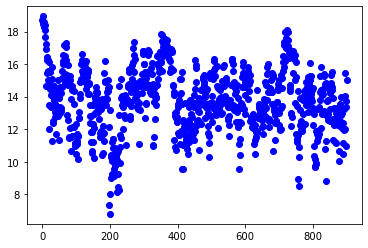

time: 2
min in generation 0 is: 19.423
min in generation 1 is: 19.1582
min in generation 2 is: 18.3471
min in generation 3 is: 18.0753
min in generation 4 is: 18.3148
min in generation 5 is: 18.141
min in generation 6 is: 18.6053
min in generation 7 is: 17.5356
min in generation 8 is: 16.4779
min in generation 9 is: 17.6581
min in generation 10 is: 15.8643
min in generation 11 is: 16.1607
min in generation 12 is: 12.6424
min in generation 13 is: 12.5681
min in generation 14 is: 15.0681
min in generation 15 is: 12.7583
min in generation 16 is: 13.1498
min in generation 17 is: 15.0397
min in generation 18 is: 14.2272
min in generation 19 is: 13.3486
min in generation 20 is: 14.2642
min in generation 21 is: 15.165
min in generation 22 is: 15.0681
min in generation 23 is: 14.9823
min in generation 24 is: 15.1786
min in generation 25 is: 10.486
min in generation 26 is: 10.5115
min in generation 27 is: 7.8936
min in generation 28 is: 5.8556
min in generation 29 is: 8.1731
min in generation 3

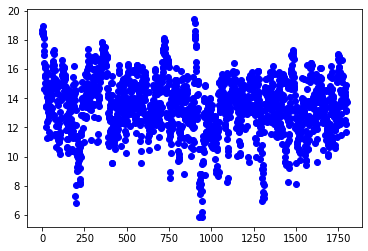

time: 3
min in generation 0 is: 18.8666
min in generation 1 is: 19.2495
min in generation 2 is: 19.1068
min in generation 3 is: 18.841
min in generation 4 is: 17.9922
min in generation 5 is: 18.1488
min in generation 6 is: 17.5821
min in generation 7 is: 17.5821
min in generation 8 is: 16.8463
min in generation 9 is: 17.2187
min in generation 10 is: 17.1817
min in generation 11 is: 16.3139
min in generation 12 is: 15.9721
min in generation 13 is: 15.9721
min in generation 14 is: 16.6682
min in generation 15 is: 15.9772
min in generation 16 is: 16.6344
min in generation 17 is: 15.1786
min in generation 18 is: 16.943
min in generation 19 is: 14.5114
min in generation 20 is: 13.2877
min in generation 21 is: 13.6159
min in generation 22 is: 13.8325
min in generation 23 is: 13.0852
min in generation 24 is: 15.3368
min in generation 25 is: 14.075
min in generation 26 is: 13.8638
min in generation 27 is: 14.8027
min in generation 28 is: 15.564
min in generation 29 is: 17.0259
min in generatio

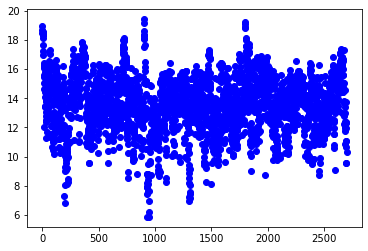

time: 4
min in generation 0 is: 19.1734
min in generation 1 is: 18.9936
min in generation 2 is: 18.2873
min in generation 3 is: 17.8296
min in generation 4 is: 18.0164
min in generation 5 is: 18.297
min in generation 6 is: 18.4128
min in generation 7 is: 17.2852
min in generation 8 is: 17.6339
min in generation 9 is: 17.4733
min in generation 10 is: 17.277
min in generation 11 is: 17.1262
min in generation 12 is: 16.8429
min in generation 13 is: 17.0383
min in generation 14 is: 16.752
min in generation 15 is: 16.5963
min in generation 16 is: 17.1351
min in generation 17 is: 16.5021
min in generation 18 is: 16.5692
min in generation 19 is: 14.3902
min in generation 20 is: 16.0995
min in generation 21 is: 15.2785
min in generation 22 is: 14.5786
min in generation 23 is: 14.9531
min in generation 24 is: 16.2205
min in generation 25 is: 16.1561
min in generation 26 is: 16.4328
min in generation 27 is: 14.3725
min in generation 28 is: 15.7185
min in generation 29 is: 14.7403
min in generati

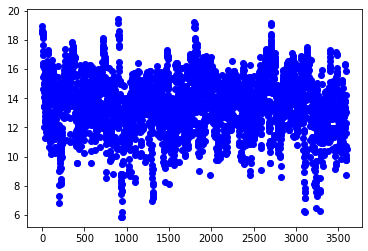

time: 5
min in generation 0 is: 18.025
min in generation 1 is: 17.3281
min in generation 2 is: 17.2271
min in generation 3 is: 17.5567
min in generation 4 is: 16.8429
min in generation 5 is: 17.2327
min in generation 6 is: 15.8695
min in generation 7 is: 14.8562
min in generation 8 is: 12.6571
min in generation 9 is: 14.2733
min in generation 10 is: 14.2825
min in generation 11 is: 13.9051
min in generation 12 is: 14.4944
min in generation 13 is: 14.5703
min in generation 14 is: 14.9236
min in generation 15 is: 13.9051
min in generation 16 is: 15.0039
min in generation 17 is: 15.3875
min in generation 18 is: 15.5992
min in generation 19 is: 15.7789
min in generation 20 is: 13.444
min in generation 21 is: 15.239
min in generation 22 is: 16.225
min in generation 23 is: 16.0947
min in generation 24 is: 15.605
min in generation 25 is: 16.1839
min in generation 26 is: 15.9721
min in generation 27 is: 17.5024
min in generation 28 is: 17.625
min in generation 29 is: 16.486
min in generation 3

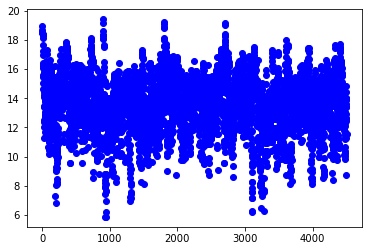

time: 6
min in generation 0 is: 16.9069
min in generation 1 is: 17.2467
min in generation 2 is: 16.683
min in generation 3 is: 17.598
min in generation 4 is: 15.957
min in generation 5 is: 17.4733
min in generation 6 is: 14.8104
min in generation 7 is: 15.9972
min in generation 8 is: 15.7516
min in generation 9 is: 15.3875
min in generation 10 is: 14.2457
min in generation 11 is: 14.931
min in generation 12 is: 14.6524
min in generation 13 is: 13.8845
min in generation 14 is: 14.8562
min in generation 15 is: 14.9823
min in generation 16 is: 14.9604
min in generation 17 is: 16.4286
min in generation 18 is: 16.7123
min in generation 19 is: 17.0568
min in generation 20 is: 17.0691
min in generation 21 is: 16.6977
min in generation 22 is: 15.9111
min in generation 23 is: 16.9332
min in generation 24 is: 15.3368
min in generation 25 is: 16.0707
min in generation 26 is: 15.0539
min in generation 27 is: 14.7007
min in generation 28 is: 15.3812
min in generation 29 is: 14.7007
min in generatio

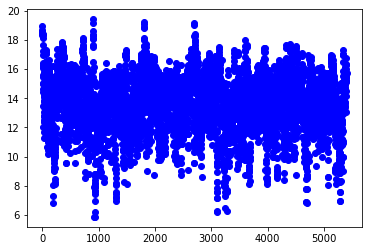

time: 7
min in generation 0 is: 19.2309
min in generation 1 is: 17.8567
min in generation 2 is: 18.8112
min in generation 3 is: 17.3933
min in generation 4 is: 17.0259
min in generation 5 is: 17.6905
min in generation 6 is: 16.0803
min in generation 7 is: 16.9299
min in generation 8 is: 17.1846
min in generation 9 is: 15.7789
min in generation 10 is: 17.066
min in generation 11 is: 17.3493
min in generation 12 is: 15.8538
min in generation 13 is: 16.017
min in generation 14 is: 16.494
min in generation 15 is: 16.5061
min in generation 16 is: 16.8869
min in generation 17 is: 16.225
min in generation 18 is: 15.9772
min in generation 19 is: 16.0803
min in generation 20 is: 14.5786
min in generation 21 is: 14.5114
min in generation 22 is: 14.4687
min in generation 23 is: 14.4687
min in generation 24 is: 13.9153
min in generation 25 is: 13.7903
min in generation 26 is: 13.5935
min in generation 27 is: 14.4773
min in generation 28 is: 14.5283
min in generation 29 is: 14.1615
min in generatio

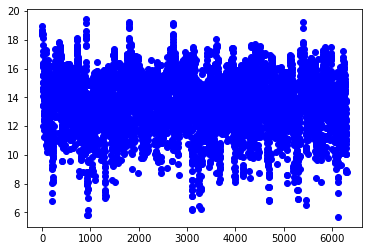

time: 8
min in generation 0 is: 19.2549
min in generation 1 is: 18.6189
min in generation 2 is: 15.8005
min in generation 3 is: 18.4726
min in generation 4 is: 18.0753
min in generation 5 is: 16.5692
min in generation 6 is: 15.4312
min in generation 7 is: 16.6002
min in generation 8 is: 16.4738
min in generation 9 is: 15.2456
min in generation 10 is: 16.8768
min in generation 11 is: 16.2787
min in generation 12 is: 15.5105
min in generation 13 is: 17.616
min in generation 14 is: 17.786
min in generation 15 is: 17.483
min in generation 16 is: 16.1421
min in generation 17 is: 15.1718
min in generation 18 is: 16.1043
min in generation 19 is: 14.6116
min in generation 20 is: 14.4687
min in generation 21 is: 14.4687
min in generation 22 is: 14.5368
min in generation 23 is: 14.0653
min in generation 24 is: 13.6493
min in generation 25 is: 14.5029
min in generation 26 is: 14.6927
min in generation 27 is: 14.8562
min in generation 28 is: 12.5075
min in generation 29 is: 13.1112
min in generati

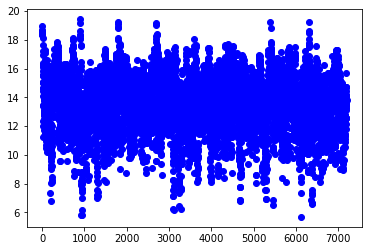

time: 9
min in generation 0 is: 18.9471
min in generation 1 is: 18.6363
min in generation 2 is: 18.0284
min in generation 3 is: 17.4363
min in generation 4 is: 17.2243
min in generation 5 is: 17.0414
min in generation 6 is: 15.7185
min in generation 7 is: 16.7123
min in generation 8 is: 15.9162
min in generation 9 is: 16.1232
min in generation 10 is: 15.6567
min in generation 11 is: 16.7196
min in generation 12 is: 16.8633
min in generation 13 is: 16.9299
min in generation 14 is: 16.7232
min in generation 15 is: 15.651
min in generation 16 is: 15.9721
min in generation 17 is: 15.1786
min in generation 18 is: 13.2506
min in generation 19 is: 13.3486
min in generation 20 is: 11.7864
min in generation 21 is: 12.7008
min in generation 22 is: 11.4592
min in generation 23 is: 11.7119
min in generation 24 is: 13.5596
min in generation 25 is: 13.3727
min in generation 26 is: 14.7403
min in generation 27 is: 14.0259
min in generation 28 is: 13.4907
min in generation 29 is: 14.0061
min in genera

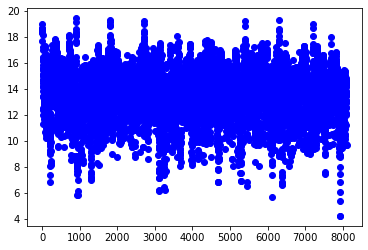

time: 10
min in generation 0 is: 19.3499
min in generation 1 is: 19.1426
min in generation 2 is: 18.5615
min in generation 3 is: 17.6294
min in generation 4 is: 18.8706
min in generation 5 is: 18.1932
min in generation 6 is: 18.2066
min in generation 7 is: 18.2718
min in generation 8 is: 18.9224
min in generation 9 is: 18.8531
min in generation 10 is: 18.6564
min in generation 11 is: 18.5427
min in generation 12 is: 18.4116
min in generation 13 is: 18.5658
min in generation 14 is: 17.8644
min in generation 15 is: 17.5072
min in generation 16 is: 17.4338
min in generation 17 is: 17.0568
min in generation 18 is: 17.0994
min in generation 19 is: 17.1233
min in generation 20 is: 16.5692
min in generation 21 is: 17.0039
min in generation 22 is: 13.6493
min in generation 23 is: 14.8257
min in generation 24 is: 13.769
min in generation 25 is: 13.7583
min in generation 26 is: 14.8713
min in generation 27 is: 14.1041
min in generation 28 is: 13.8534
min in generation 29 is: 11.2532
min in gener

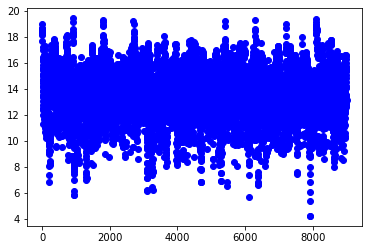

In [15]:
# Main

initial_population = first_population(population_size,D,100)
population_bin =[]
minimums_of_gen =[]

# Answer
minimums=[]


for t in range(10):
    
    print(f"time: {t+1}")
    
    initial_population = first_population(population_size,D,t)
    #population_bin =[]
    #minimums_of_gen =[]
    
    
    for i in range(generation_num):

        # a list of fitness calculated population
        fit_caled_pop =fitness_cal(initial_population)
        minimum = min(fit_caled_pop)

        print(f"min in generation {i} is: {minimum}")
        minimums_of_gen.append(minimum)
        
        if minimum==0:
            break
        
        
        
        #if i==714:
            #print(initial_population[minimums.index(minimum)])




        # selected population
        sel_pop = selection(fit_caled_pop,initial_population,selection_size)
        random.shuffle(sel_pop)

        sel_pop_bin =[]
        # converting population to binary version
        for a in sel_pop:
            temp=[]
            for ax in a:
                temp.append(to_binary(ax))
            sel_pop_bin.append(temp)


        # Cross over
        sel_pop_bin_cross=[]
        for j in range(0, len(sel_pop_bin)-1, 2):
            x=sel_pop_bin[j]
            y=sel_pop_bin[j+1]

            child_ch1=[]
            child_ch2=[]
            for p in range(len(x)):
                parent1=x[p]
                parent2=y[p]
                child_ch1.append(cross_one_point(parent1, parent2))
                # ["101101,"001011","011101",..] --> len = D
                child_ch2.append(cross_one_point(parent2, parent1))

            sel_pop_bin_cross.append(child_ch1)
            sel_pop_bin_cross.append(child_ch2)

        # Mutation
        for k in range(len(sel_pop_bin_cross)):
            sel_pop_bin_cross[k] = mutation(sel_pop_bin_cross[k])
            #sel_pop_bin_cross[k] = mutation2(sel_pop_bin_cross[k])


        #if i==93:
            #print(sel_pop_bin_cross)

        # Replace
        initial_population =[]
        for l in sel_pop_bin_cross:
            te=[]
            for ll in l:
                te.append(to_decimal(ll))
            initial_population.append(te)
        
    ypoints= np.array(minimums_of_gen)
    plt.plot(ypoints, 'o',color="blue")
    plt.show()

        
    # last minimum
    minimums.append(minimums_of_gen[len(minimums_of_gen)-1])
        



    

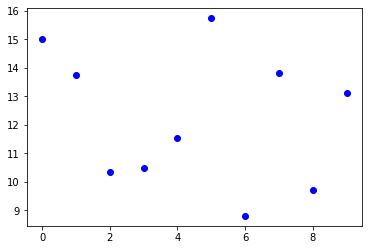

6


In [17]:
ypoints= np.array(minimums)
plt.plot(ypoints, 'o',color="blue")
plt.show()
print(minimums.index(min(minimums)))

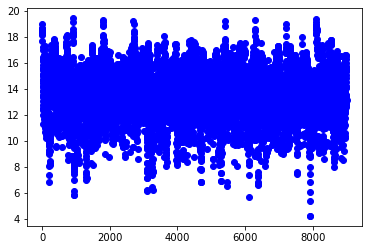

In [18]:
ypoints= np.array(minimums_of_gen)
plt.plot(ypoints, 'o',color="blue")
plt.show()
